<a href="https://colab.research.google.com/github/DrashtiSanjayShah/Market-Basket-Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARKET BASKET ANALYSIS


IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  #we ignore any warnings encountered

**numpy** for working with arrays. The full form of numpy is Numerical Python.
**pandas** is for data manipulation.
**seaborn** is based on matplotlib utilised for data visualization.


IMPORTING DATASET

In [2]:
df = pd.read_csv("/content/Groceries_dataset.csv")

In [3]:
df.head() #head() shows the first 5 entries

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.tail() #tail gives the last 5 entries

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

.isnull() is used to check if there are any null values in the dataset. .sum() is used to give the sum of null values in each of the dataset columns.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [8]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

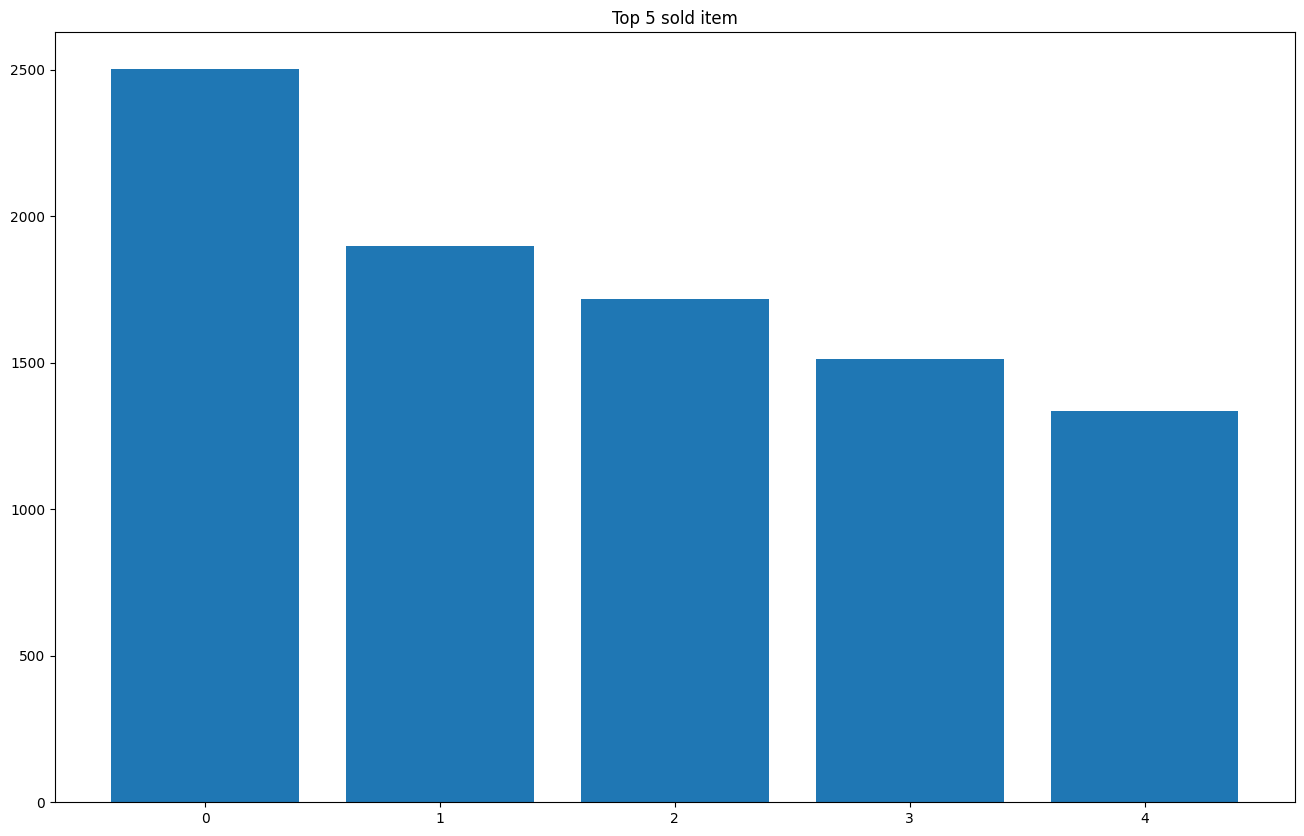

In [9]:
item_dis = df.groupby(by = 'itemDescription').size().reset_index(name='frequency').sort_values(by = 'frequency', ascending = False).head()
bars = item_dis['itemDescription']
height = item_dis['frequency']
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,10))

plt.bar(x_pos,height)
plt.title("Top 5 sold item")
# plt.xticks(x_pos, bars)
plt.show()

In [10]:
item_dis.head()

,itemDescription,frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334


In [11]:
df_date = df.set_index(['Date']) #setting the Date as the new index
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


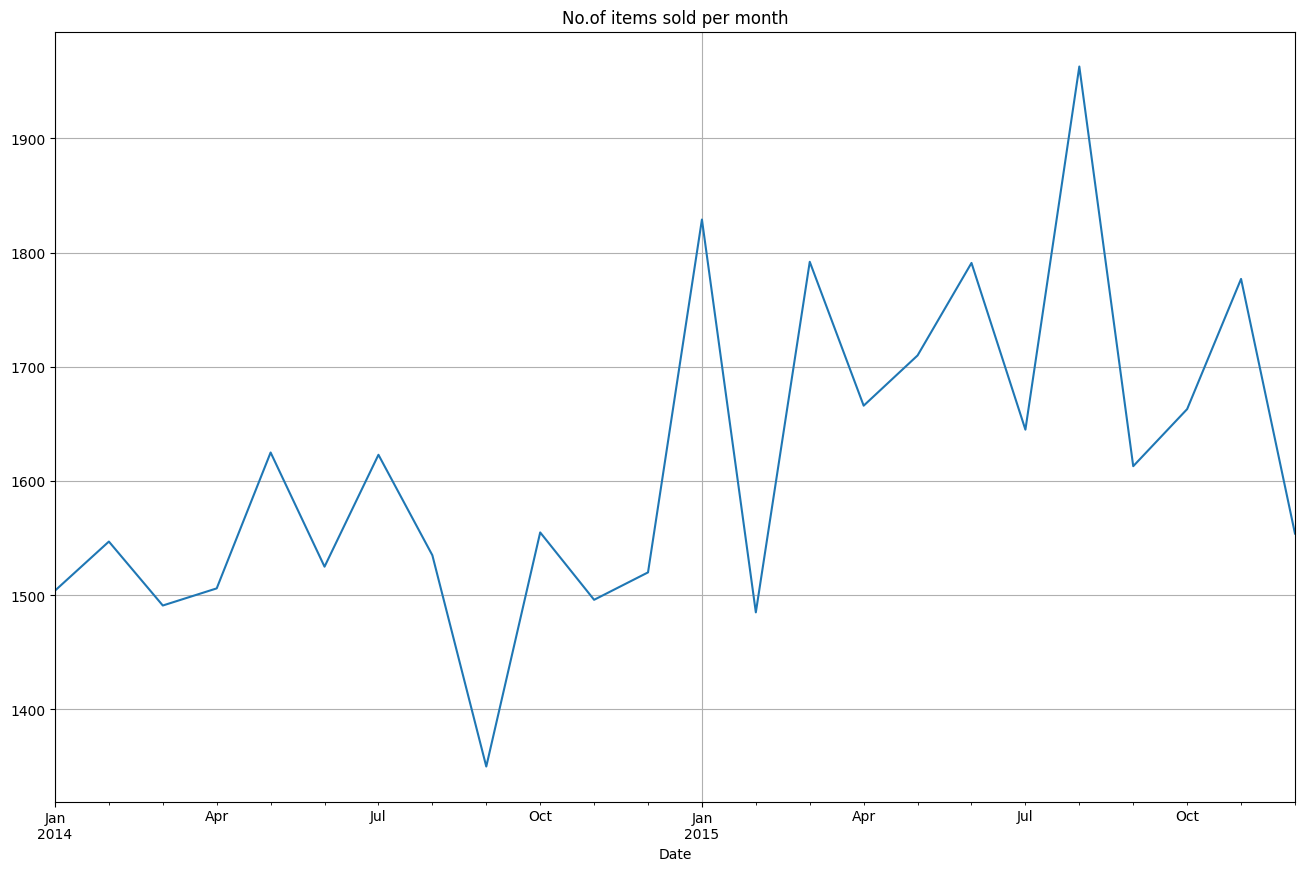

In [12]:
df_date.resample('M')['itemDescription'].count().plot(figsize=(16,10),grid=True, title='No.of items sold per month')
plt.xlabel ='date'
plt.ylabel='quantity sold'


In [13]:
cust_level = df[['Member_number', 'itemDescription']].sort_values(by = 'Member_number', ascending = False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In the fist line we are defining a new variable - ***cust_level*** and assigning it the values of ***'Member_number', 'itemDescription'***

---
In the second line, we are targeting the ***itemDescription ***column and removing any white spaces before and after the item name.



In [14]:
transactions = [a[1]['itemDescription'].tolist()
for a in list(cust_level.groupby(['Member_number']))]

In this case we are making list of items bought by each member and converting it into a list.


In [15]:
!pip install apyori

In [54]:
from apyori import apriori
rules = apriori(transactions=transactions, min_support=0.002, min_confidence=0.05, min_lift=3, min_length=2)

In [57]:

# # Display all the association rules
# for rule in rules:
#     antecedents = list(rule.items)
#     consequents = list(rule.ordered_statistics[0].items_base)
#     support = rule.support
#     confidence = rule.ordered_statistics[0].confidence
#     lift = rule.ordered_statistics[0].lift

#     print(f"Rule: {consequents} -> {antecedents}")
#     print(f"Support: {support:.4f}")
#     print(f"Confidence: {confidence:.4f}")
#     print(f"Lift: {lift:.4f}")
#     print("\n")

## Display the top 5 association rules
count = 0
for rule in rules:
    antecedents = list(rule.items)
    consequents = list(rule.ordered_statistics[0].items_base)
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence
    lift = rule.ordered_statistics[0].lift

    print(f"Rule: {consequents} -> {antecedents}")
    print(f"Support: {support:.4f}")
    print(f"Confidence: {confidence:.4f}")
    print(f"Lift: {lift:.4f}")
    print("\n")

    count += 1
    if count == 10:
        break


Rule: ['rice'] -> ['napkins', 'rice']
Support: 0.0031
Confidence: 0.2449
Lift: 3.0114


Rule: ['sparkling wine'] -> ['sparkling wine', 'waffles']
Support: 0.0026
Confidence: 0.2174
Lift: 3.1502


Rule: ['Instant food products'] -> ['soda', 'beef', 'Instant food products']
Support: 0.0021
Confidence: 0.1333
Lift: 3.1122


Rule: ['Instant food products'] -> ['root vegetables', 'margarine', 'Instant food products']
Support: 0.0026
Confidence: 0.1667
Lift: 5.4594


Rule: ['Instant food products'] -> ['soda', 'margarine', 'Instant food products']
Support: 0.0021
Confidence: 0.1333
Lift: 3.2895


Rule: ['candy', 'frankfurter'] -> ['UHT-milk', 'candy', 'frankfurter']
Support: 0.0023
Confidence: 0.2647
Lift: 3.3720


Rule: ['waffles', 'UHT-milk'] -> ['chicken', 'waffles', 'UHT-milk']
Support: 0.0021
Confidence: 0.3200
Lift: 3.1820


Rule: ['chocolate', 'curd'] -> ['chocolate', 'curd', 'UHT-milk']
Support: 0.0028
Confidence: 0.2750
Lift: 3.5031


Rule: ['misc. beverages', 'UHT-milk'] -> ['coffe